# Credit Card Fraud Detection Using Machine Learning

In [1]:
# Importing the libraries
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
#import io
#dataset = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

Follow the link to Download the dataset and Extractinto project directory

https://drive.google.com/file/d/1YUiJpUcrAYWkzzYTdRI7jkJUStLrDsu3/view?usp=sharing

# Read Data Set

In [2]:
dataset = pd.read_csv('creditcard.csv')

Text(0, 0.5, 'Frequency')

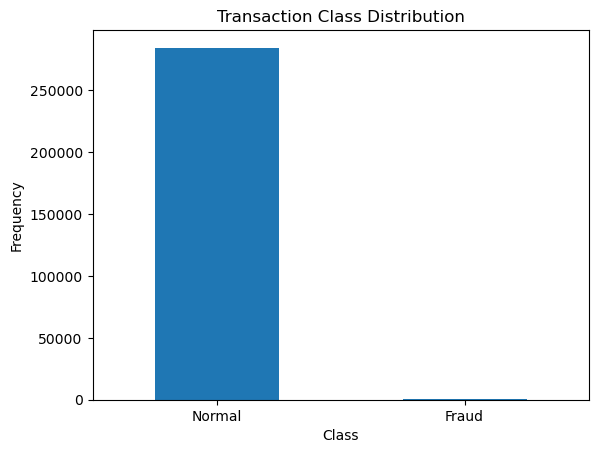

In [3]:
Fraud = dataset[dataset['Class']==1]

Normal = dataset[dataset['Class']==0]

#count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes = pd.Series(dataset['Class']).value_counts(sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

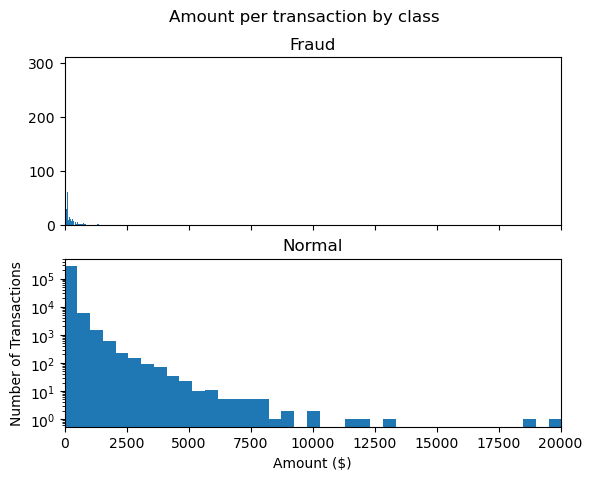

In [4]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

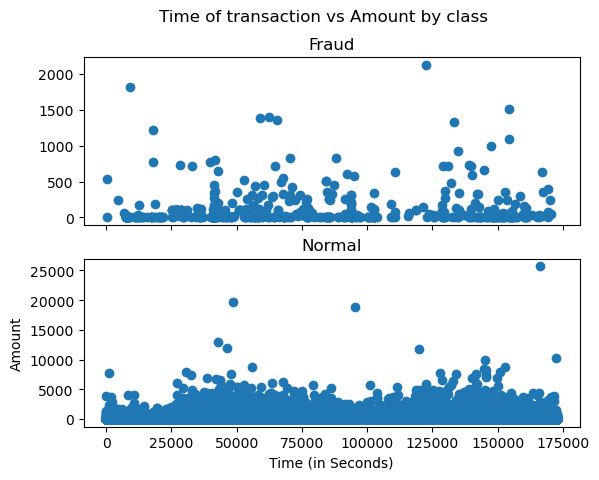

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

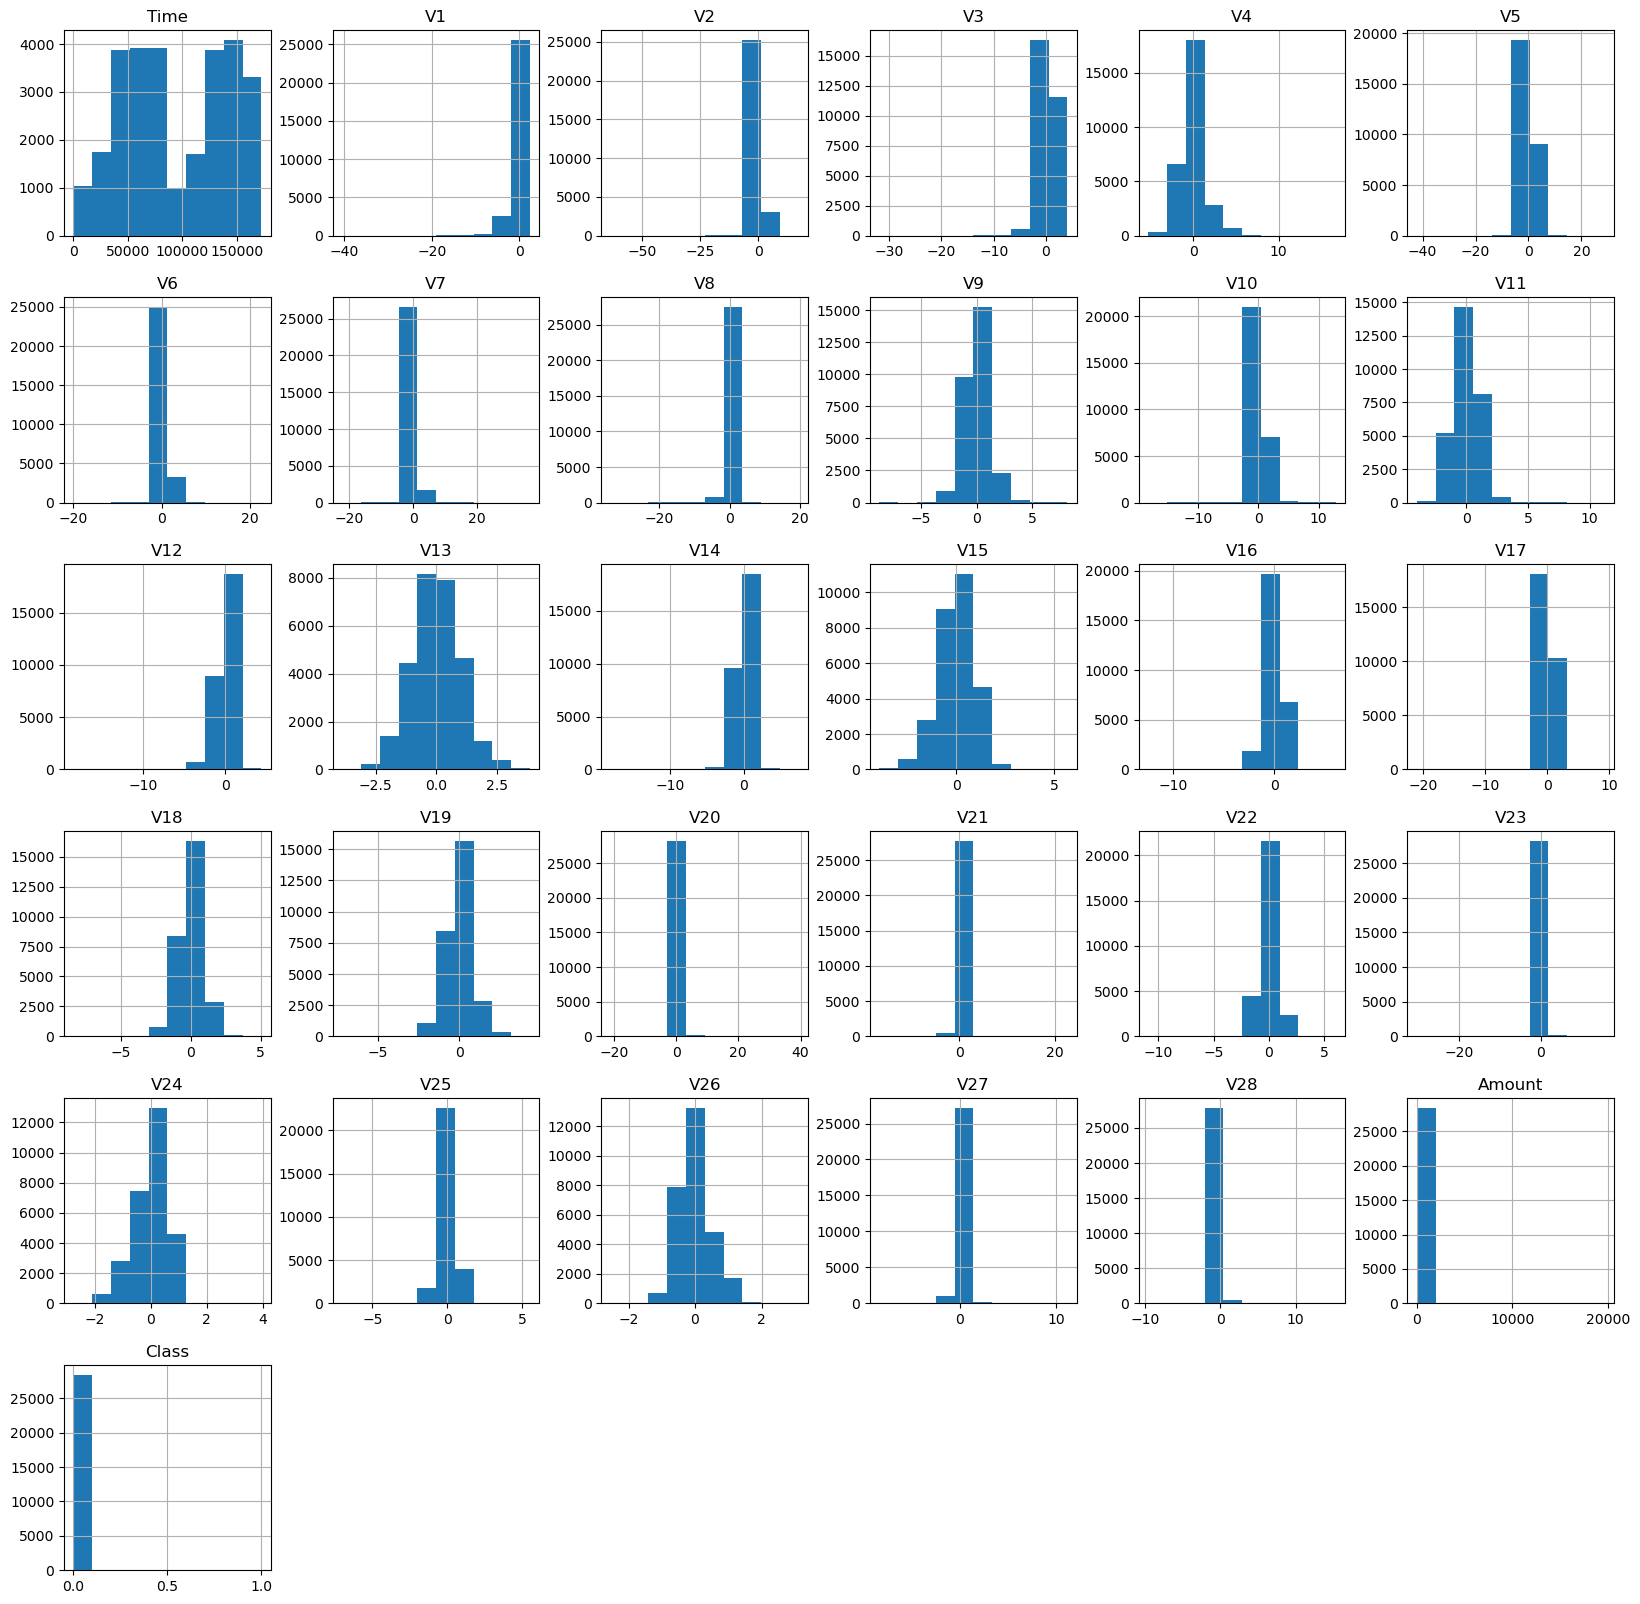

In [6]:
data1= dataset.sample(frac = 0.1,random_state=1)
data1.hist(figsize=(20,20))
plt.show()

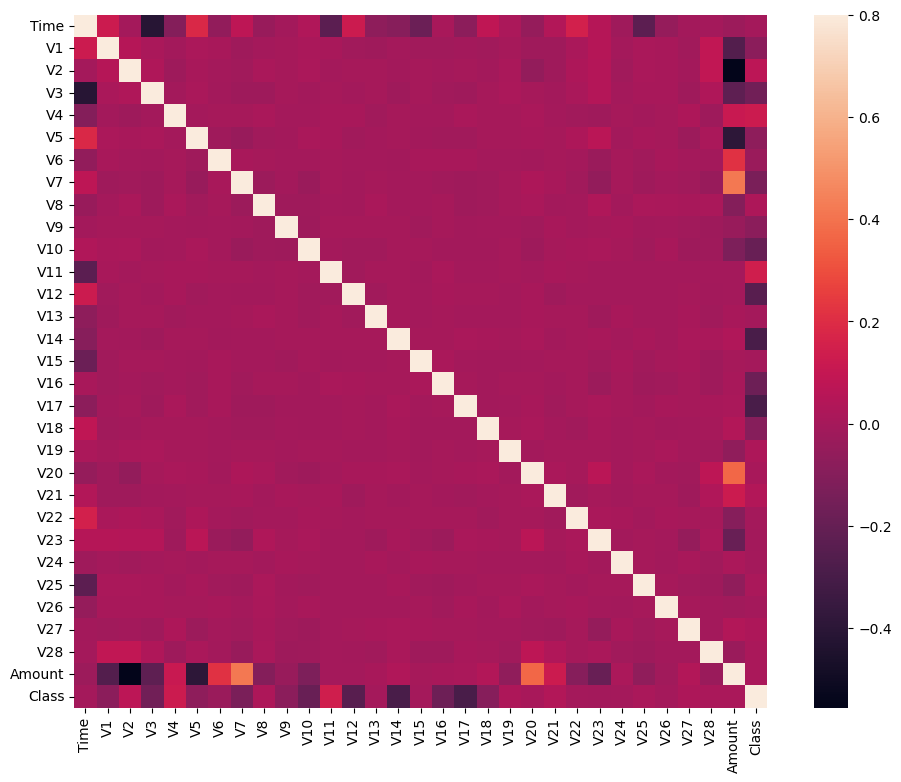

In [7]:
import seaborn as sns
correlation_matrix = data1.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

# Preprocess and splitting the dataset

In [8]:
X = dataset.iloc[:, [1, 29]].values
y = dataset.iloc[:, 30].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Normal

Confusion matrix for Normal logistic regression
[[71074     8]
 [  120     0]]
AUC for Normal Logistic Regression: 0.793


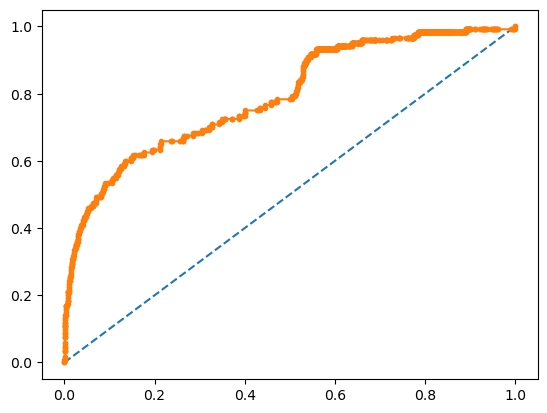

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion matrix for Normal logistic regression')
print(cm1)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc1 = roc_auc_score(y_test, probs)
print('AUC for Normal Logistic Regression: %.3f' % auc1)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# KNN Algorithm  normal 

Confusion matrix for NormalKNN
[[71074     8]
 [  119     1]]
AUC for Normal KNN: 0.576


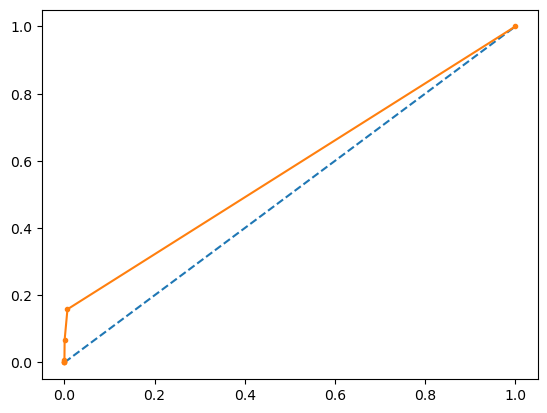

In [10]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix for NormalKNN')
print(cm2)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc2 = roc_auc_score(y_test, probs)
print('AUC for Normal KNN: %.3f' % auc2)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Decision Tree normal

Confusion matrix for Normal Decision Tree
[[71082     0]
 [  120     0]]
AUC for Normal Decision Tree: 0.844


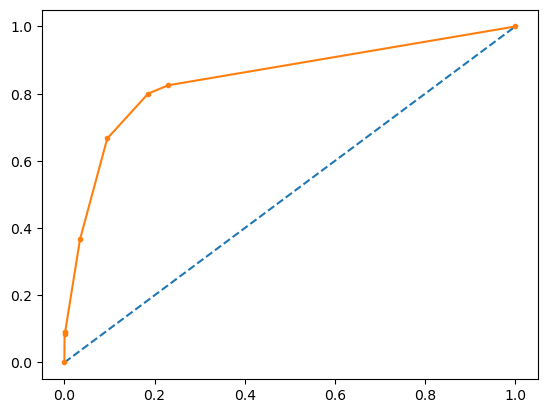

In [11]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion matrix for Normal Decision Tree')
print(cm3)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc3 = roc_auc_score(y_test, probs)
print('AUC for Normal Decision Tree: %.3f' % auc3)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Random Forest normal

Confusion matrix for Normal Random Forest
[[71047    35]
 [  115     5]]
AUC for Normal Random Forest: 0.615


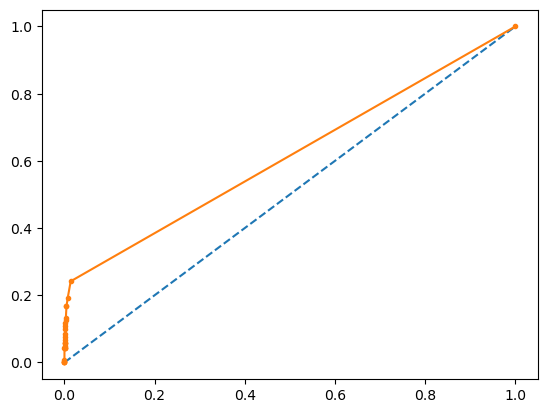

In [12]:
classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_train, y_train)
y_pred4 = classifier.predict(X_test)                                                
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion matrix for Normal Random Forest')
print(cm4)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc4 = roc_auc_score(y_test, probs)
print('AUC for Normal Random Forest: %.3f' % auc4)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Xgboost normal

Confusion matrix for Normal XGBoost
[[71079     3]
 [  118     2]]
AUC for Normal XGboost: 0.883


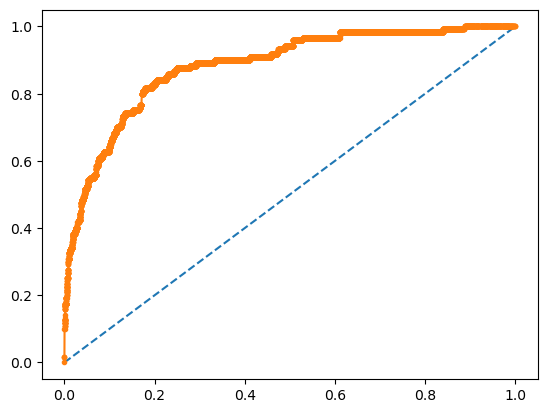

In [13]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print('Confusion matrix for Normal XGBoost')
print(cm5)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc5 = roc_auc_score(y_test, probs)
print('AUC for Normal XGboost: %.3f' % auc5)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Using Oversampling

In [14]:
X_train_normal = X_train[y_train == 0]
y_train_normal = y_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]
y_train_fraud = y_train[y_train == 1]
X_train_fraud, y_train_fraud = resample(X_train_fraud, y_train_fraud, n_samples = len(y_train_normal), replace = True, random_state = 333)
X_train_oversample = np.concatenate((X_train_normal, X_train_fraud), axis=0)
y_train_oversample = np.concatenate((y_train_normal, y_train_fraud), axis=0)

# Random oversampling + LR

Confusion matrix for Random Oversampling + Logistic Regression
[[59456 11626]
 [   41    79]]
AUC for Random Oversampling + Logistic Regression: 0.812


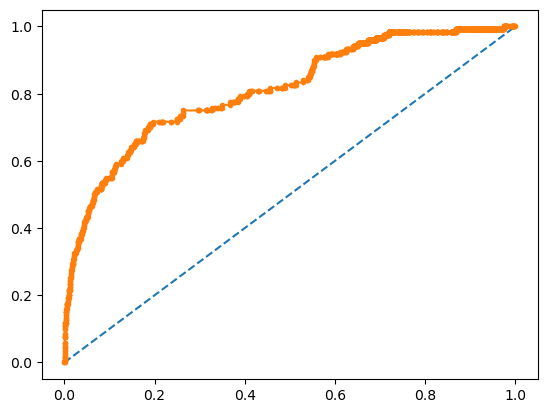

In [15]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_oversample, y_train_oversample)
y_pred6 = classifier.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print('Confusion matrix for Random Oversampling + Logistic Regression')
print(cm6)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc6 = roc_auc_score(y_test, probs)
print('AUC for Random Oversampling + Logistic Regression: %.3f' % auc6)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Random Oversampling+KNN

Confusion matrix for random oversampling + KNN
[[59456 11626]
 [   41    79]]
AUC for Random oversampling + KNN: 0.576


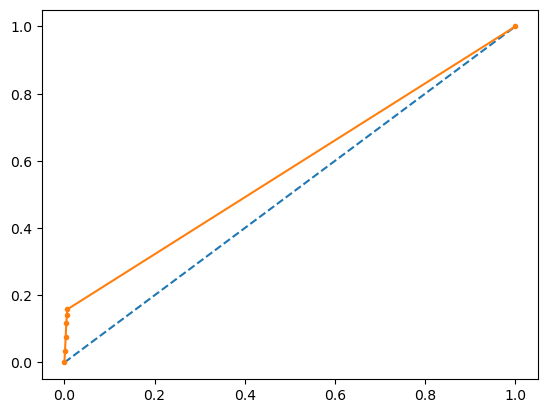

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_oversample, y_train_oversample)
y_pred7 = classifier.predict(X_test)
cm7 = confusion_matrix(y_test, y_pred6)
print('Confusion matrix for random oversampling + KNN')
print(cm7)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc7 = roc_auc_score(y_test, probs)
print('AUC for Random oversampling + KNN: %.3f' % auc7)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Random oversampling + Decision tree

Confusion matrix for Random oversampling +Decision Tree
[[58993 12089]
 [   26    94]]
AUC for random oversampling+Decision Tree: 0.841


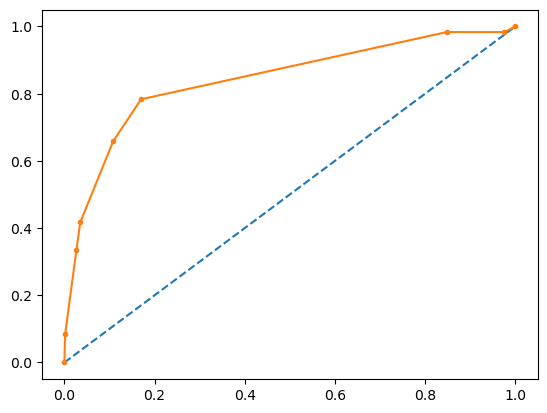

In [17]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_train_oversample, y_train_oversample)
y_pred8 = classifier.predict(X_test)
cm8 = confusion_matrix(y_test, y_pred8)
print('Confusion matrix for Random oversampling +Decision Tree')
print(cm8)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc8 = roc_auc_score(y_test, probs)
print('AUC for random oversampling+Decision Tree: %.3f' % auc8)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Random oversampling+Random Forest

Confusion matrix for Random Oversampling +Random Forest
[[71032    50]
 [  113     7]]
AUC for Random oversampling+Random Forest: 0.610


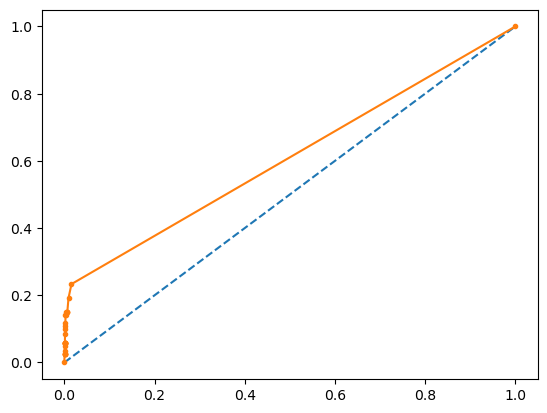

In [18]:
classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_train_oversample, y_train_oversample)
y_pred9 = classifier.predict(X_test)                                                
cm9 = confusion_matrix(y_test, y_pred9)
print('Confusion matrix for Random Oversampling +Random Forest')
print(cm9)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc9 = roc_auc_score(y_test, probs)
print('AUC for Random oversampling+Random Forest: %.3f' % auc9)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Random oversampling + Xgboost

Confusion matrix for Random oversampling + XGBoost
[[69001  2081]
 [   76    44]]
AUC for Random oversampling + XGBoost: 0.836


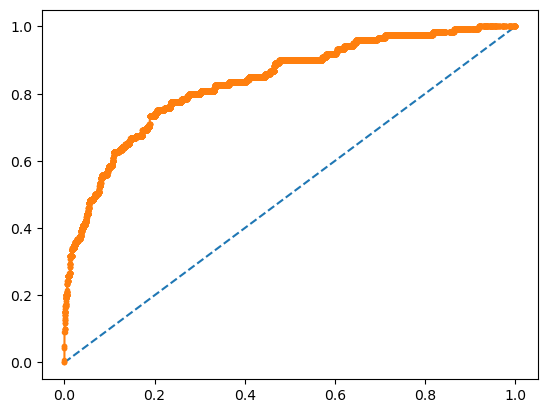

In [19]:
model = XGBClassifier()
model.fit(X_train_oversample, y_train_oversample)
y_pred10 = model.predict(X_test)
cm10 = confusion_matrix(y_test, y_pred10)
print('Confusion matrix for Random oversampling + XGBoost')
print(cm10)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc10 = roc_auc_score(y_test, probs)
print('AUC for Random oversampling + XGBoost: %.3f' % auc10)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Undersampling

In [20]:
X_train_normal = X_train[y_train == 0]
y_train_normal = y_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]
y_train_fraud = y_train[y_train == 1]

X_train_normal, y_train_normal = resample(X_train_normal, y_train_normal, n_samples = len(y_train_fraud), replace = False, random_state = 333)

X_train_undersample = np.concatenate((X_train_normal, X_train_fraud), axis=0)
y_train_undersample = np.concatenate((y_train_normal, y_train_fraud), axis=0)

# undersampling

Confusion matrix for Random Undersampling + Logistic Regression
[[57475 13607]
 [   35    85]]
AUC for Undersampling +Logistic Regression: 0.812


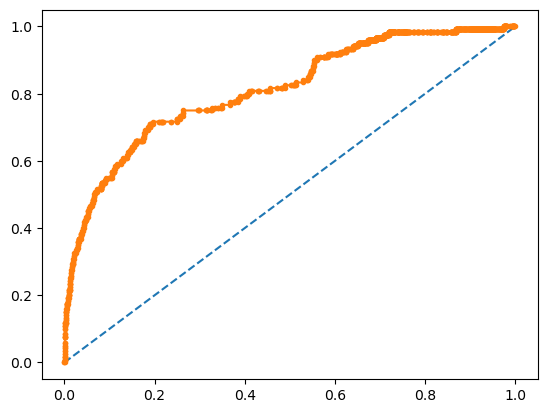

In [21]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_undersample, y_train_undersample)
y_pred11 = classifier.predict(X_test)
cm11 = confusion_matrix(y_test, y_pred11)
print('Confusion matrix for Random Undersampling + Logistic Regression')
print(cm11)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc11 = roc_auc_score(y_test, probs)
print('AUC for Undersampling +Logistic Regression: %.3f' % auc11)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Undersampling+KNN

Confusion matrix for Random Undersampling+KNN
[[55546 15536]
 [   28    92]]
AUC for random Undersampling+KNN: 0.834


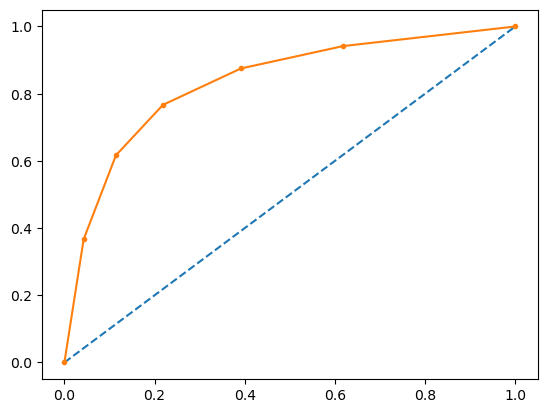

In [22]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_undersample, y_train_undersample)
y_pred12 = classifier.predict(X_test)
cm12 = confusion_matrix(y_test, y_pred12)
print('Confusion matrix for Random Undersampling+KNN')
print(cm12)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc12 = roc_auc_score(y_test, probs)
print('AUC for random Undersampling+KNN: %.3f' % auc12)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Undersampling+Decision tree

Confusion matrix for Random Undersampling+Decision Tree
[[61288  9794]
 [   30    90]]
AUC for Random Undersampling+Decision Tree: 0.838


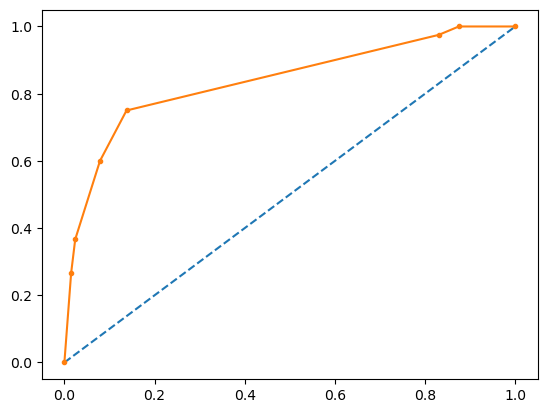

In [23]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_train_undersample, y_train_undersample)
y_pred13 = classifier.predict(X_test)
cm13 = confusion_matrix(y_test, y_pred13)
print('Confusion matrix for Random Undersampling+Decision Tree')
print(cm13)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc13 = roc_auc_score(y_test, probs)
print('AUC for Random Undersampling+Decision Tree: %.3f' % auc13)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Undersampling+Random Forest

Confusion matrix for Random Undersampling+Random Forest
[[57573 13509]
 [   28    92]]
AUC for Random Undersampling+Random Forest: 0.856


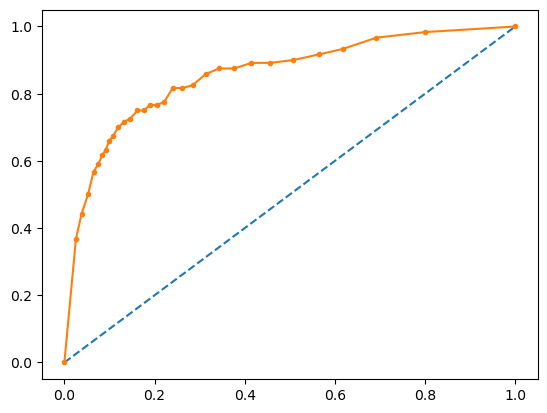

In [24]:
classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_train_undersample, y_train_undersample)
y_pred14 = classifier.predict(X_test)                                                
cm14 = confusion_matrix(y_test, y_pred14)
print('Confusion matrix for Random Undersampling+Random Forest')
print(cm14)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc14 = roc_auc_score(y_test, probs)
print('AUC for Random Undersampling+Random Forest: %.3f' % auc14)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Undersampling + Xgboost normal

Confusion matrix for random undersampling + XGBoost
[[56034 15048]
 [   27    93]]
AUC for Random Undersampling + XGboost: 0.849


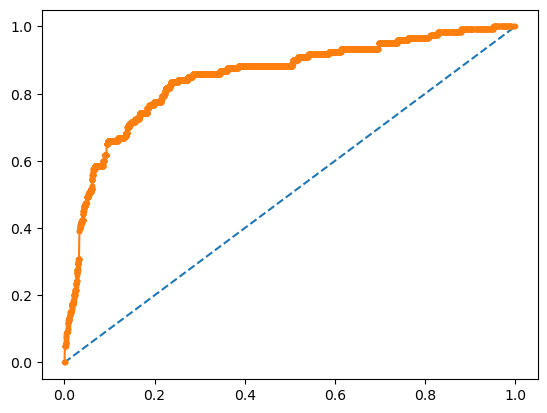

In [25]:
model = XGBClassifier()
model.fit(X_train_undersample, y_train_undersample)
y_pred15 = model.predict(X_test)
cm15 = confusion_matrix(y_test, y_pred15)
print('Confusion matrix for random undersampling + XGBoost')
print(cm15)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc15 = roc_auc_score(y_test, probs)
print('AUC for Random Undersampling + XGboost: %.3f' % auc15)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# TomekLinks

In [26]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

# TL+LR

Confusion matrix for Undersampling(TL) + Logistic Regression
[[71074     8]
 [  120     0]]
AUC for Undersampling(TL) +Logistic Regression: 0.792


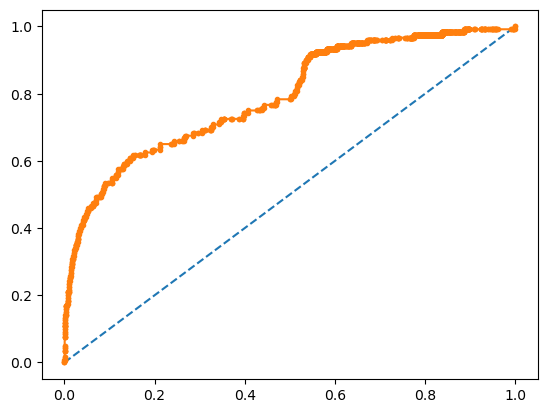

In [27]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_tl, y_tl)
y_pred16 = classifier.predict(X_test)
cm16 = confusion_matrix(y_test, y_pred16)
print('Confusion matrix for Undersampling(TL) + Logistic Regression')
print(cm16)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc16 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(TL) +Logistic Regression: %.3f' % auc16)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# TL+KNN

Confusion matrix for Undersampling(TL)+KNN
[[71073     9]
 [  117     3]]
AUC for Undersampling(TL)+KNN: 0.576


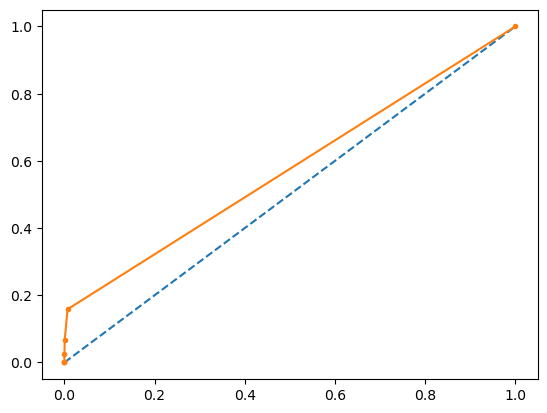

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_tl, y_tl)
y_pred17 = classifier.predict(X_test)
cm17 = confusion_matrix(y_test, y_pred17)
print('Confusion matrix for Undersampling(TL)+KNN')
print(cm17)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc17 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(TL)+KNN: %.3f' % auc17)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# TL+Decision tree

Confusion matrix for Undersampling(TL)+Decision Tree
[[71082     0]
 [  120     0]]
AUC for Undersampling(TL)+Decision Tree: 0.844


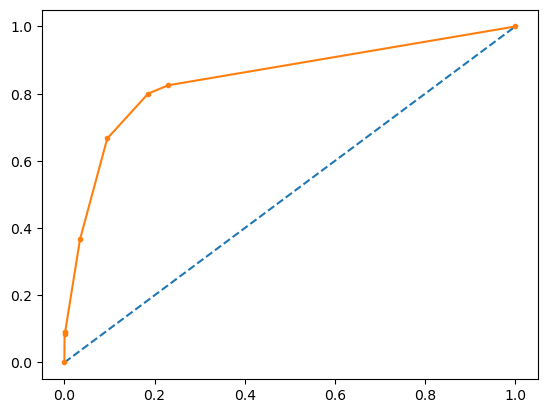

In [29]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_tl, y_tl)
y_pred18 = classifier.predict(X_test)
cm18 = confusion_matrix(y_test, y_pred18)
print('Confusion matrix for Undersampling(TL)+Decision Tree')
print(cm18)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc18 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(TL)+Decision Tree: %.3f' % auc18)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# TL+Random Forest

Confusion matrix for Undersampling(TL)+Random Forest
[[71033    49]
 [  111     9]]
AUC for Undersampling(TL)+Random Forest: 0.619


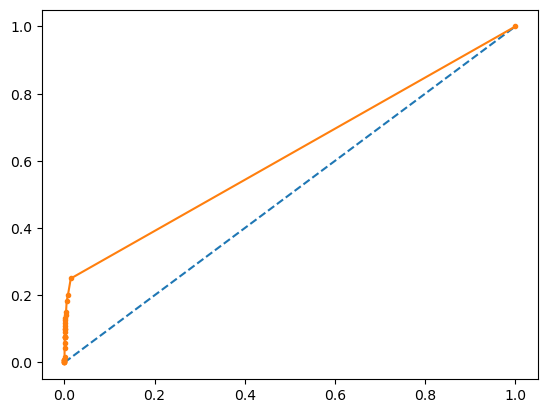

In [30]:
classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_tl, y_tl)
y_pred19 = classifier.predict(X_test)                                                
cm19 = confusion_matrix(y_test, y_pred19)
print('Confusion matrix for Undersampling(TL)+Random Forest')
print(cm19)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc19 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(TL)+Random Forest: %.3f' % auc19)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# TL + Xgboost

Confusion matrix for Undersampling (TL)+ XGBoost
[[71080     2]
 [  118     2]]
AUC for Undersampling (TL)+ XGboost: 0.882


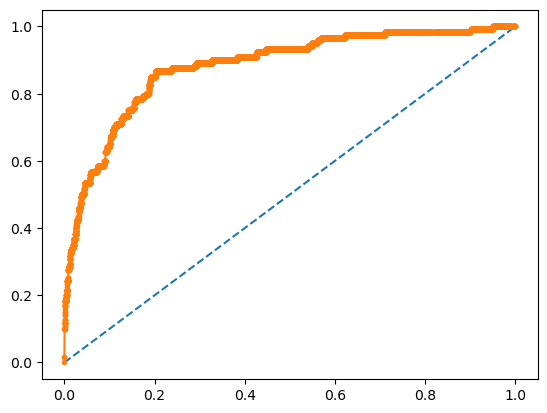

In [31]:
model = XGBClassifier()
model.fit(X_tl, y_tl)
y_pred20 = model.predict(X_test)
cm20 = confusion_matrix(y_test, y_pred20)
print('Confusion matrix for Undersampling (TL)+ XGBoost')
print(cm20)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc20 = roc_auc_score(y_test, probs)
print('AUC for Undersampling (TL)+ XGboost: %.3f' % auc20)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Cluster Centroids

In [32]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

cc = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)
X_cc, y_cc = cc.fit_resample(X_test, y_test)

# CC+LR

Confusion matrix for Undersampling(CC) + Logistic Regression
[[54234 16848]
 [   41    79]]
AUC for Undersampling(CC) +Logistic Regression: 0.796


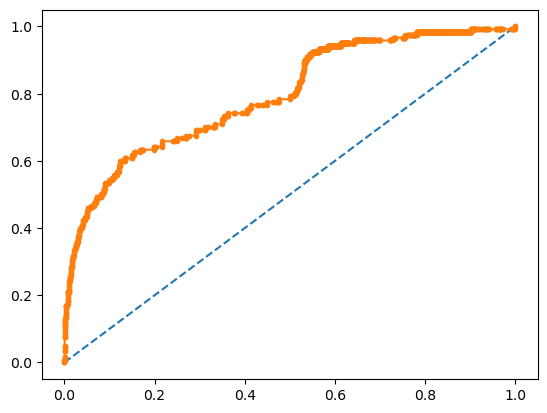

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_cc, y_cc)
y_pred21 = classifier.predict(X_test)
cm21= confusion_matrix(y_test, y_pred21)
print('Confusion matrix for Undersampling(CC) + Logistic Regression')
print(cm21)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc21 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(CC) +Logistic Regression: %.3f' % auc21)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# CC+KNN

Confusion matrix for Undersampling (CC) +KNN
[[53624 17458]
 [   31    89]]
AUC for Undersampling(CC)+KNN: 0.841


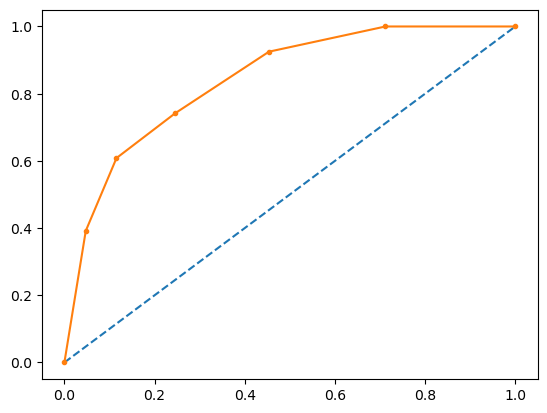

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_cc, y_cc)
y_pred22 = classifier.predict(X_test)
cm22 = confusion_matrix(y_test, y_pred22)
print('Confusion matrix for Undersampling (CC) +KNN')
print(cm22)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc22 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(CC)+KNN: %.3f' % auc22)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# CC+Decision tree

Confusion matrix for Undersampling(CC) +Decision Tree
[[56791 14291]
 [   24    96]]
AUC for Undersampling(CC)+Decision Tree: 0.839


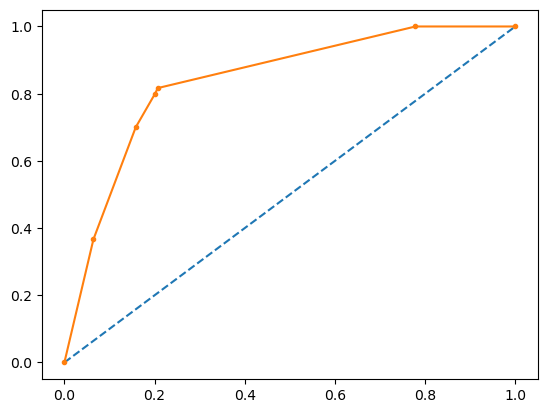

In [35]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_cc, y_cc)
y_pred23 = classifier.predict(X_test)
cm23 = confusion_matrix(y_test, y_pred23)
print('Confusion matrix for Undersampling(CC) +Decision Tree')
print(cm23)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc23 = roc_auc_score(y_test, probs)
print('AUC for Undersampling(CC)+Decision Tree: %.3f' % auc23)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# CC+Random Forest

Confusion matrix for Undersampling(CC)+Random Forest
[[53944 17138]
 [    1   119]]
AUC for Undersampling (CC)+Random Forest: 0.934


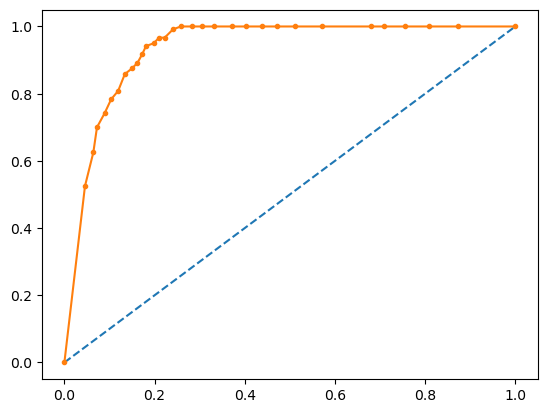

In [36]:
classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(X_cc, y_cc)
y_pred24 = classifier.predict(X_test)                                                
cm24 = confusion_matrix(y_test, y_pred24)
print('Confusion matrix for Undersampling(CC)+Random Forest')
print(cm24)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc24 = roc_auc_score(y_test, probs)
print('AUC for Undersampling (CC)+Random Forest: %.3f' % auc24)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# CC + Xgboost

Confusion matrix for Undersampling (CC)+XGBoost
[[50187 20895]
 [    0   120]]
AUC for Undersampling (CC)+XGboost: 0.924


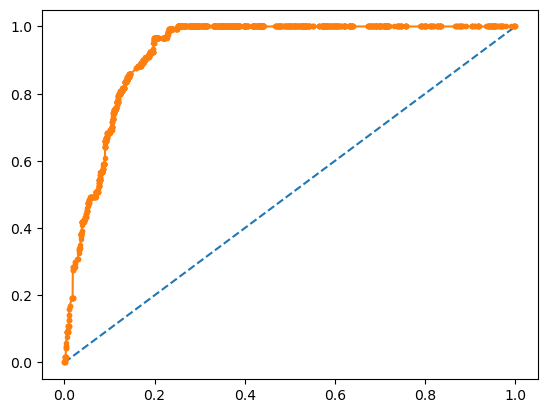

In [37]:
model = XGBClassifier()
model.fit(X_cc, y_cc)
y_pred25 = model.predict(X_test)
cm25 = confusion_matrix(y_test, y_pred25)
print('Confusion matrix for Undersampling (CC)+XGBoost')
print(cm25)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc25 = roc_auc_score(y_test, probs)
print('AUC for Undersampling (CC)+XGboost: %.3f' % auc25)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE - Synthetic Minority Oversampling Technique

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_test, y_test)

# SMOTE+LR

Confusion matrix for OVersampling(SMOTE) + Logistic Regression
[[58768 12314]
 [   40    80]]
AUC for OVersampling(SMOTE) +Logistic Regression: 0.811


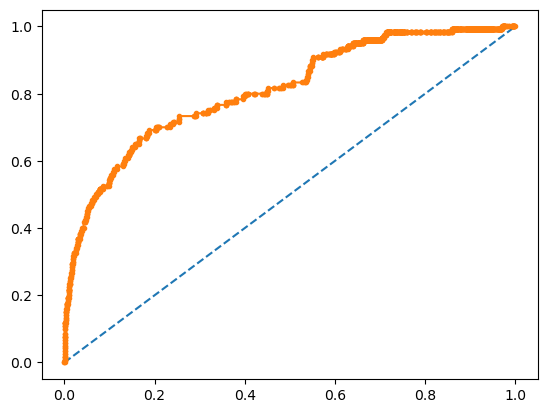

In [39]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_sm, y_sm)
y_pred26 = classifier.predict(X_test)
cm26 = confusion_matrix(y_test, y_pred26)
print('Confusion matrix for OVersampling(SMOTE) + Logistic Regression')
print(cm26)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc26 = roc_auc_score(y_test, probs)
print('AUC for OVersampling(SMOTE) +Logistic Regression: %.3f' % auc26)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE+Decision tree

Confusion matrix for OVersampling(SMOTE)+Decision Tree
[[55178 15904]
 [   20   100]]
AUC for OVersampling(SMOTE)+Decision Tree: 0.875


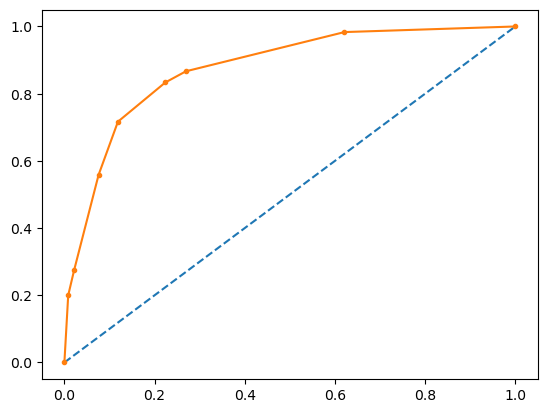

In [40]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_sm, y_sm)
y_pred28 = classifier.predict(X_test)
cm28 = confusion_matrix(y_test, y_pred28)
print('Confusion matrix for OVersampling(SMOTE)+Decision Tree')
print(cm28)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc28 = roc_auc_score(y_test, probs)
print('AUC for OVersampling(SMOTE)+Decision Tree: %.3f' % auc28)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE + Xgboost

Confusion matrix for OVersampling(SMOTE) + XGBoost
[[65435  5647]
 [    3   117]]
AUC for OVersampling(SMOTE) + XGboost: 0.984


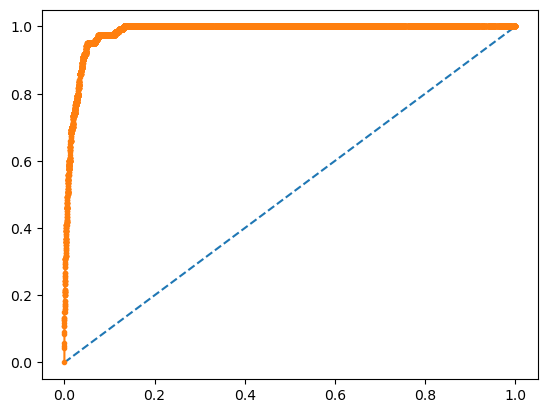

In [41]:
model = XGBClassifier()
model.fit(X_sm, y_sm)
y_pred30 = model.predict(X_test)
cm30 = confusion_matrix(y_test, y_pred30)
print('Confusion matrix for OVersampling(SMOTE) + XGBoost')
print(cm30)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc30 = roc_auc_score(y_test, probs)
print('AUC for OVersampling(SMOTE) + XGboost: %.3f' % auc30)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE+TL

In [42]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_test, y_test)

# SMOTE+TL+LR

Confusion matrix for OVerUNDERsampling(SMOTE+TL) + Logistic Regression
[[58699 12383]
 [   40    80]]
AUC for OVerUNDERsampling(SMOTE+TL) + Logistic Regression: 0.811


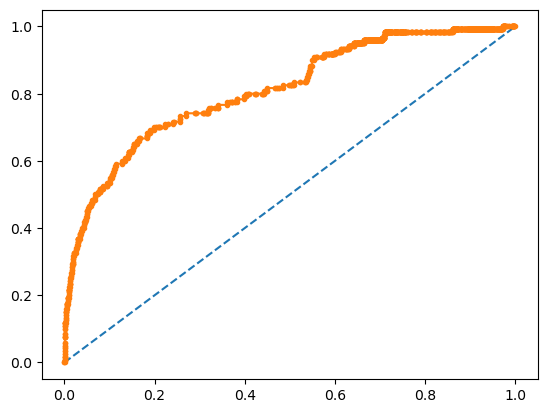

In [43]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_smt, y_smt)
y_pred31 = classifier.predict(X_test)
cm31 = confusion_matrix(y_test, y_pred31)
print('Confusion matrix for OVerUNDERsampling(SMOTE+TL) + Logistic Regression')
print(cm31)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc31 = roc_auc_score(y_test, probs)
print('AUC for OVerUNDERsampling(SMOTE+TL) + Logistic Regression: %.3f' % auc31)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE + TL + Decision tree

Confusion matrix for OVerUNDERsampling(SMOTE+TL) + Decision Tree
[[55157 15925]
 [   20   100]]
AUC for OVerUNDERsampling(SMOTE+TL) + Decision Tree: 0.875


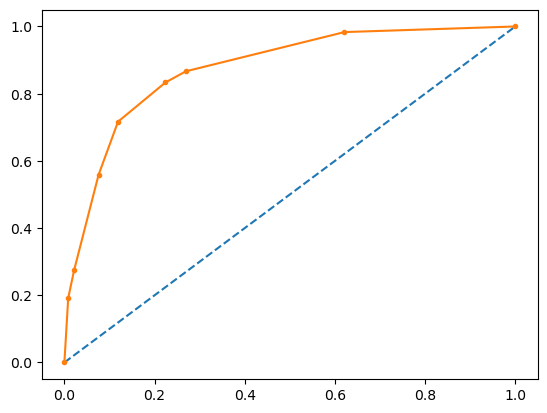

In [44]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_smt, y_smt)
y_pred33 = classifier.predict(X_test)
cm33 = confusion_matrix(y_test, y_pred33)
print('Confusion matrix for OVerUNDERsampling(SMOTE+TL) + Decision Tree')
print(cm33)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc33 = roc_auc_score(y_test, probs)
print('AUC for OVerUNDERsampling(SMOTE+TL) + Decision Tree: %.3f' % auc33)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# SMOTE + TL + Xgboost

#### from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_smt, y_smt)
y_pred35 = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm35 = confusion_matrix(y_test, y_pred35)
print('Confusion matrix for OVerUNDERsampling(SMOTE+TL) + XGBoost')
print(cm35)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc35 = roc_auc_score(y_test, probs)
print('AUC for OVerUNDERsampling(SMOTE+TL) + XGboost: %.3f' % auc35)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [45]:
print ("Accuracy comparsion for Normal Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc1)
print("K-Nearest neighbour | %.3f" % auc2)
print("Decision Tree       | %.3f" % auc3)
print("Random Forest       | %.3f" % auc4) 
print("XGBoost             | %.3f" % auc5)


Accuracy comparsion for Normal Algorithms
------------------------------------------
Logistic Regression | 0.793
K-Nearest neighbour | 0.576
Decision Tree       | 0.844
Random Forest       | 0.615
XGBoost             | 0.883


In [46]:
print ("Accuracy comparsion for Random Oversample Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc6)
print("K-Nearest neighbour | %.3f" % auc7)
print("Decision Tree       | %.3f" % auc8)
print("Random Forest       | %.3f" % auc9) 
print("XGBoost             | %.3f" % auc10)

Accuracy comparsion for Random Oversample Algorithms
------------------------------------------
Logistic Regression | 0.812
K-Nearest neighbour | 0.576
Decision Tree       | 0.841
Random Forest       | 0.610
XGBoost             | 0.836


In [47]:
print ("Accuracy comparsion for Random Undersampled Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc11)
print("K-Nearest neighbour | %.3f" % auc12)
print("Decision Tree       | %.3f" % auc13)
print("Random Forest       | %.3f" % auc14) 
print("XGBoost             | %.3f" % auc15)

Accuracy comparsion for Random Undersampled Algorithms
------------------------------------------
Logistic Regression | 0.812
K-Nearest neighbour | 0.834
Decision Tree       | 0.838
Random Forest       | 0.856
XGBoost             | 0.849


In [48]:
print ("Accuracy comparsion for TomekLinks Undersampled Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc16)
print("K-Nearest neighbour | %.3f" % auc17)
print("Decision Tree       | %.3f" % auc18)
print("Random Forest       | %.3f" % auc19) 
print("XGBoost             | %.3f" % auc20)

Accuracy comparsion for TomekLinks Undersampled Algorithms
------------------------------------------
Logistic Regression | 0.792
K-Nearest neighbour | 0.576
Decision Tree       | 0.844
Random Forest       | 0.619
XGBoost             | 0.882


In [49]:
print ("Accuracy comparsion for Cluster Centroids Undersampled Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc21)
print("K-Nearest neighbour | %.3f" % auc22)
print("Decision Tree       | %.3f" % auc23)
print("Random Forest       | %.3f" % auc24) 
print("XGBoost             | %.3f" % auc25)

Accuracy comparsion for Cluster Centroids Undersampled Algorithms
------------------------------------------
Logistic Regression | 0.796
K-Nearest neighbour | 0.841
Decision Tree       | 0.839
Random Forest       | 0.934
XGBoost             | 0.924


In [50]:
print ("Accuracy comparsion for SMOTE Oversampled Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc26)
print("Decision Tree       | %.3f" % auc28) 
print("XGBoost             | %.3f" % auc30)

Accuracy comparsion for SMOTE Oversampled Algorithms
------------------------------------------
Logistic Regression | 0.811
Decision Tree       | 0.875
XGBoost             | 0.984


In [51]:
print ("Accuracy comparsion for SMOTE+TL Algorithms")

print ("------------------------------------------")

print("Logistic Regression | %.3f" % auc31)
print("Decision Tree       | %.3f" % auc33)
print("XGBoost             | %.3f" % auc35)

Accuracy comparsion for SMOTE+TL Algorithms
------------------------------------------
Logistic Regression | 0.811
Decision Tree       | 0.875


NameError: name 'auc35' is not defined

In [ ]:
print ("Accuracy comparsion for Logistic Regression")

print ("------------------------------------------")

print("Normal                   | %.3f" % auc1)
print("Random Oversample        | %.3f" % auc6)
print("Random Undersample       | %.3f" % auc11)
print("Tomeklinks undersample   | %.3f" % auc16) 
print("Cluster centroids        | %.3f" % auc21)
print("SMOTE                    | %.3f" % auc26)
print("SMOTE+TL                 | %.3f" % auc31)

In [ ]:
print ("Accuracy comparsion for KNN")

print ("------------------------------------------")

print("Normal                   | %.3f" % auc2)
print("Random Oversample        | %.3f" % auc7)
print("Random Undersample       | %.3f" % auc12)
print("Tomeklinks undersample   | %.3f" % auc17) 
print("Cluster centroids        | %.3f" % auc22)

In [ ]:
print ("Accuracy comparsion for Decision Tree")

print ("------------------------------------------")

print("Normal                   | %.3f" % auc3)
print("Random Oversample        | %.3f" % auc8)
print("Random Undersample       | %.3f" % auc13)
print("Tomeklinks undersample   | %.3f" % auc18) 
print("Cluster centroids        | %.3f" % auc23)
print("SMOTE                    | %.3f" % auc28)
print("SMOTE+TL                 | %.3f" % auc33)

In [ ]:
print ("Accuracy comparsion for Random Forest")

print ("------------------------------------------")

print("Normal                   | %.3f" % auc4)
print("Random Oversample        | %.3f" % auc9)
print("Random Undersample       | %.3f" % auc14)
print("Tomeklinks undersample   | %.3f" % auc19) 
print("Cluster centroids        | %.3f" % auc24)

In [ ]:
print ("Accuracy comparsion for XGBoost")

print ("------------------------------------------")

print("Normal                   | %.3f" % auc5)
print("Random Oversample        | %.3f" % auc10)
print("Random Undersample       | %.3f" % auc15)
print("Tomeklinks undersample   | %.3f" % auc20) 
print("Cluster centroids        | %.3f" % auc25)
print("SMOTE                    | %.3f" % auc30)
print("SMOTE+TL                 | %.3f" % auc35)